In [274]:
import sqlite3

import requests

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import json

import seaborn as sns

import matplotlib.patches as mpatches

In [275]:
df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')

In [276]:
df = df.drop(columns=['genre_ids', 'id', 'original_language', 'release_date', 'original_title', 'popularity'])

In [277]:
new_df = df[df['vote_count'] > 10000]

In [278]:
highest_vote_average = new_df.sort_values('vote_average', ascending = False)
highest_vote_average = highest_vote_average.head(10)
highest_vote_average

,title,vote_average,vote_count
4,Inception,8.3,22186
23811,Avengers: Infinity War,8.3,13948
11032,Interstellar,8.2,18597
2472,The Lion King,8.2,10160
2471,Harry Potter and the Deathly Hallows: Part 2,8.1,11567
11026,The Imitation Game,8.1,10396
19,Shutter Island,8.1,12625
14184,Inside Out,8.0,12691
5189,Django Unchained,8.0,15725
7883,The Wolf of Wall Street,7.9,12411


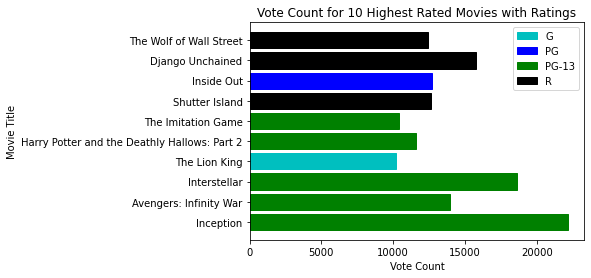

In [299]:
 bar1 = plt.barh(highest_vote_average['title'], highest_vote_average['vote_count'])
bar1[9].set_color('black')
bar1[8].set_color('black')
bar1[7].set_color('b')
bar1[6].set_color('black')
bar1[5].set_color('g')
bar1[4].set_color('g')
bar1[3].set_color('c')
bar1[2].set_color('g')
bar1[1].set_color('g')
bar1[0].set_color('g')
plt.title('Vote Count for 10 Highest Rated Movies with Ratings')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')

cyan_patch = mpatches.Patch(color='c', label='G')
blue_patch = mpatches.Patch(color='b', label='PG')
green_patch = mpatches.Patch(color='g', label='PG-13')
black_patch = mpatches.Patch(color='black', label='R')
plt.legend(handles=[cyan_patch, blue_patch, green_patch, black_patch])

plt.show()

In [280]:
df2 = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

In [281]:
df2 = df2.drop(columns=['release_date', 'id'])

In [282]:
df2['production_budget'] = df2['production_budget'].astype(str)
df2['production_budget'] = df2['production_budget'].str.replace(',','').str.replace('$','').astype('int64')
df2['domestic_gross'] = df2['domestic_gross'].astype(str)
df2['domestic_gross'] = df2['domestic_gross'].str.replace(',','').str.replace('$','').astype('int')
df2['worldwide_gross'] = df2['worldwide_gross'].astype(str)
df2['worldwide_gross'] = df2['worldwide_gross'].str.replace(',','').str.replace('$','').astype('int64')

In [283]:
highest_worldwide_gross = df2.sort_values('worldwide_gross', ascending = False)
highest_worldwide_gross = highest_worldwide_gross.head(100)
highest_worldwide_gross

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
42,Titanic,200000000,659363944,2208208395
5,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,Avengers: Infinity War,300000000,678815482,2048134200
33,Jurassic World,215000000,652270625,1648854864
...,...,...,...,...
54,X-Men: Days of Future Past,200000000,233921534,747862775
196,Madagascar 3: Europe's Most Wanted,145000000,216391482,746921271
99,Suicide Squad,175000000,325100054,746059887
52,Monsters University,200000000,268488329,743588329


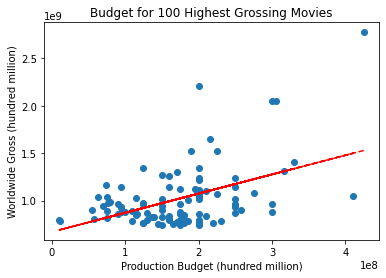

In [284]:
data = highest_worldwide_gross[['production_budget', 'worldwide_gross']]
x = data['production_budget']
y = data['worldwide_gross']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('Budget for 100 Highest Grossing Movies')
plt.xlabel('Production Budget (hundred million)')
plt.ylabel('Worldwide Gross (hundred million)')

plt.show()